In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('C:/Users/TripleA/Desktop/coding related/python/TISS/UV_FINAL.csv')

In [4]:
df.dtypes

Date & Time        object
UV Index          float64
High UV Index     float64
UV Dose - MEDs    float64
dtype: object

In [5]:
df['Date & Time'] = pd.to_datetime(df['Date & Time'])

C:\Users\TripleA\AppData\Local\Temp\ipykernel_5252\1271372107.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date & Time'] = pd.to_datetime(df['Date & Time'])


In [6]:
df.dtypes

Date & Time       datetime64[ns]
UV Index                 float64
High UV Index            float64
UV Dose - MEDs           float64
dtype: object

In [7]:
df.set_index('Date & Time', inplace=True)

In [8]:
df.dropna(inplace=True)

In [9]:
df

,UV Index,High UV Index,UV Dose - MEDs
Date & Time,,,
2023-09-01 07:20:00,0.0,0.0,0.0
2023-09-01 07:25:00,0.0,0.0,0.0
2023-09-01 07:30:00,0.0,0.0,0.0
2023-09-01 08:50:00,2.0,2.0,0.1
2023-09-01 08:55:00,2.0,2.0,0.1
...,...,...,...
2023-09-30 17:55:00,0.0,0.0,0.0
2023-09-30 18:00:00,0.0,0.0,0.0
2023-09-30 18:05:00,0.0,0.0,0.0


PER WEEK

In [10]:
per_week = df['UV Index'].resample('W')

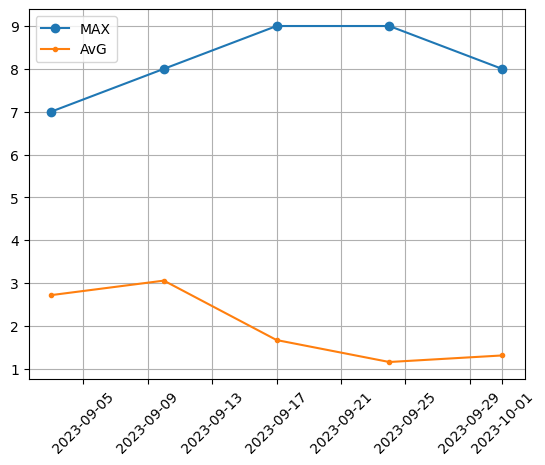

In [11]:
plt.plot(per_week.max(),'o-', label = 'MAX')
plt.plot(per_week.mean(),'.-', label = 'AvG')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()

PER DAY

In [12]:
per_day = df['UV Index'].resample('D')

In [13]:
per_day.max()

Date & Time
2023-09-01    7.0
2023-09-02    6.0
2023-09-03    0.0
2023-09-04    8.0
2023-09-05    8.0
2023-09-06    7.0
2023-09-07    0.0
2023-09-08    3.0
2023-09-09    6.0
2023-09-10    7.0
2023-09-11    8.0
2023-09-12    8.0
2023-09-13    8.0
2023-09-14    9.0
2023-09-15    9.0
2023-09-16    4.0
2023-09-17    7.0
2023-09-18    8.0
2023-09-19    8.0
2023-09-20    9.0
2023-09-21    9.0
2023-09-22    4.0
2023-09-23    7.0
2023-09-24    6.0
2023-09-25    8.0
2023-09-26    6.0
2023-09-27    5.0
2023-09-28    7.0
2023-09-29    6.0
2023-09-30    6.0
Freq: D, Name: UV Index, dtype: float64

In [14]:
avg_per_day = df['UV Index'].resample('D')

Text(0.5, 1.0, 'UV INDEX PER DAY')

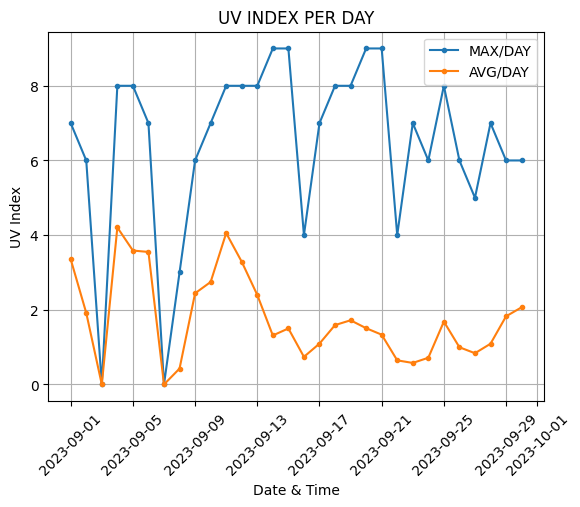

In [15]:
plt.plot(per_day.max() , '.-', label ='MAX/DAY' )
plt.plot(avg_per_day.mean(),'.-',label = 'AVG/DAY')
plt.xlabel('Date & Time')
plt.xticks(rotation = 45)
plt.ylabel('UV Index')
plt.grid(True)
plt.legend()
plt.title('UV INDEX PER DAY')

DAY

    DAY 14(HIGH MAX UV)

In [16]:
day14 = df['2023-09-14 00:00:00':'2023-09-14 23:55:00']

In [17]:
day14 = day14.resample('h')

(array([19614.   , 19614.125, 19614.25 , 19614.375, 19614.5  , 19614.625,
        19614.75 , 19614.875, 19615.   ]),
 [Text(19614.0, 0, '09-14 00'),
  Text(19614.125, 0, '09-14 03'),
  Text(19614.25, 0, '09-14 06'),
  Text(19614.375, 0, '09-14 09'),
  Text(19614.5, 0, '09-14 12'),
  Text(19614.625, 0, '09-14 15'),
  Text(19614.75, 0, '09-14 18'),
  Text(19614.875, 0, '09-14 21'),
  Text(19615.0, 0, '09-15 00')])

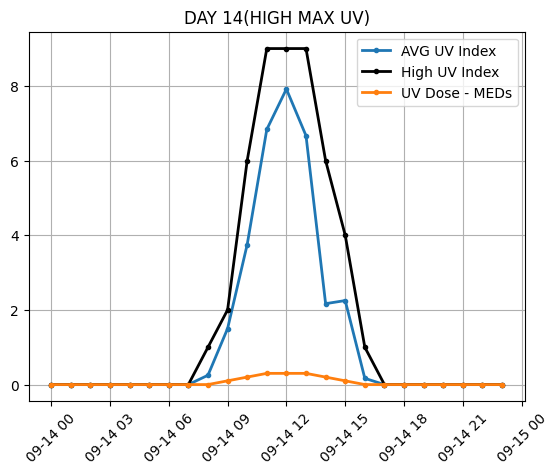

In [18]:
plt.plot(day14['UV Index'].mean(),'.-',linewidth = 2,label = 'AVG UV Index')
plt.plot(day14['High UV Index'].max(), 'k.-',linewidth = 2,label='High UV Index')
plt.plot(day14['UV Dose - MEDs'].max(),'.-',linewidth = 2,label='UV Dose - MEDs')
plt.legend()
plt.title('DAY 14(HIGH MAX UV)')
plt.grid(True)
plt.xticks(rotation=45)

        FROM 7AM-5PM

In [19]:
day14_peakhr = df['2023-09-21 06:00:00':'2023-09-21 18:00:00']

In [20]:
day14_peakhr = day14_peakhr.resample('h')

(array([19621.25      , 19621.33333333, 19621.41666667, 19621.5       ,
        19621.58333333, 19621.66666667, 19621.75      ]),
 [Text(19621.25, 0, '09-21 06'),
  Text(19621.333333333332, 0, '09-21 08'),
  Text(19621.416666666668, 0, '09-21 10'),
  Text(19621.5, 0, '09-21 12'),
  Text(19621.583333333332, 0, '09-21 14'),
  Text(19621.666666666668, 0, '09-21 16'),
  Text(19621.75, 0, '09-21 18')])

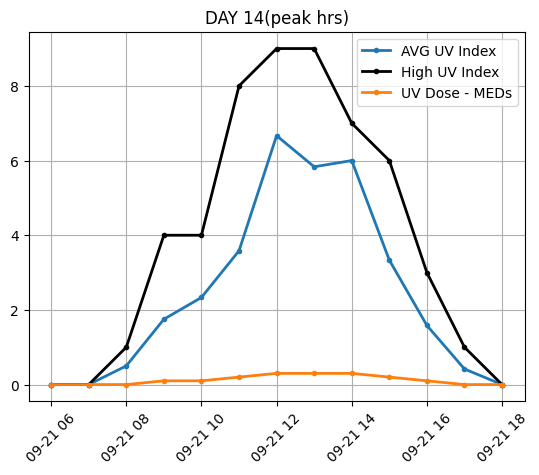

In [21]:
plt.plot(day14_peakhr['UV Index'].mean(),'.-',linewidth = 2,label = 'AVG UV Index')
plt.plot(day14_peakhr['High UV Index'].max(), 'k.-',linewidth = 2,label='High UV Index')
plt.plot(day14_peakhr['UV Dose - MEDs'].max(),'.-',linewidth = 2,label='UV Dose - MEDs')
plt.legend()
plt.title('DAY 14(peak hrs)')
plt.grid(True)
plt.xticks(rotation=45)

    DAY 21(high MAX UV)


In [22]:
day21 = df['2023-09-21 00:00:00':'2023-09-21 23:55:00']

In [23]:
day21 = day21.resample('h')

(array([19621.   , 19621.125, 19621.25 , 19621.375, 19621.5  , 19621.625,
        19621.75 , 19621.875, 19622.   ]),
 [Text(19621.0, 0, '09-21 00'),
  Text(19621.125, 0, '09-21 03'),
  Text(19621.25, 0, '09-21 06'),
  Text(19621.375, 0, '09-21 09'),
  Text(19621.5, 0, '09-21 12'),
  Text(19621.625, 0, '09-21 15'),
  Text(19621.75, 0, '09-21 18'),
  Text(19621.875, 0, '09-21 21'),
  Text(19622.0, 0, '09-22 00')])

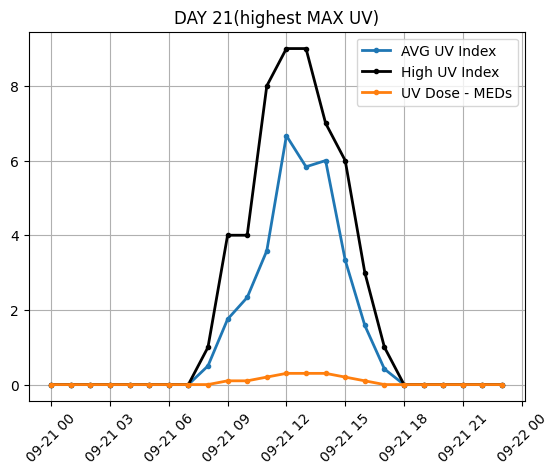

In [28]:
plt.plot(day21['UV Index'].mean(),'.-',linewidth = 2,label = 'AVG UV Index')

plt.plot(day21['High UV Index'].max(), 'k.-',linewidth = 2,label='High UV Index')
plt.plot(day21['UV Dose - MEDs'].max(),'.-',linewidth = 2,label='UV Dose - MEDs')
plt.legend()
plt.title('DAY 21(highest MAX UV)')
plt.grid(True)
plt.xticks(rotation=45)

    DAY 22(Lowest MAX UV)

In [25]:
day22 = df['2023-09-22 00:00:00':'2023-09-22 23:55:00']

In [26]:
day22 = day22.resample('h')

(array([19622.   , 19622.125, 19622.25 , 19622.375, 19622.5  , 19622.625,
        19622.75 , 19622.875, 19623.   ]),
 [Text(19622.0, 0, '09-22 00'),
  Text(19622.125, 0, '09-22 03'),
  Text(19622.25, 0, '09-22 06'),
  Text(19622.375, 0, '09-22 09'),
  Text(19622.5, 0, '09-22 12'),
  Text(19622.625, 0, '09-22 15'),
  Text(19622.75, 0, '09-22 18'),
  Text(19622.875, 0, '09-22 21'),
  Text(19623.0, 0, '09-23 00')])

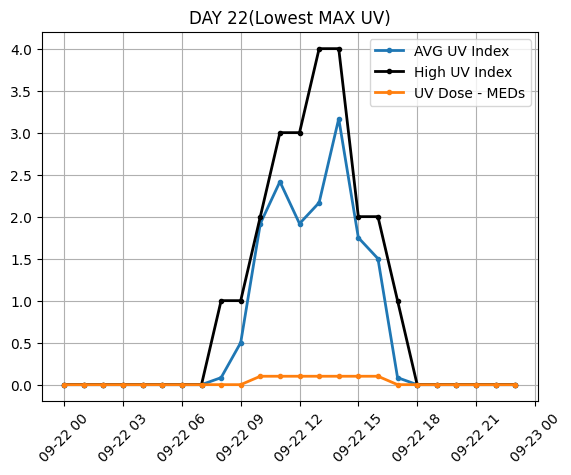

In [27]:
plt.plot(day22['UV Index'].mean(),'.-',linewidth = 2,label = 'AVG UV Index')
plt.plot(day22['High UV Index'].max(), 'k.-',linewidth = 2,label='High UV Index')
plt.plot(day22['UV Dose - MEDs'].max(),'.-',linewidth = 2,label='UV Dose - MEDs')
plt.title('DAY 22(Lowest MAX UV)')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)